### now we run the feature and continud 

In [1]:
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.ensemble import BaggingRegressor
from sklearn.feature_selection import RFECV

import catboost as cb

from sklearn.metrics import r2_score

In [22]:
# !pip install nest-asyncio
import nest_asyncio
nest_asyncio.apply()
%run ./NewFeatureFile.ipynb

عملتها يا شباب كدا انا ضامن استقلالية البرنامج شوية و ان شاء الله احسن المره الجايه
كدا حيكون معاك 
df , df_prep , test , full_test وباقي الحاجات اللى اتعملت في ال features 


In [3]:
scoring=rmsle_scorer

In [4]:
print(df_prep.shape)
df_prep.head(3)

(5760, 53)


,Date,y,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Week,Month,WeekDay,Rush_hour,Dead_hour,...,Sky_State,Temp_State,GBL_Forecast,Date_tmp,Prev Month y,Temperature lag1,Rainfall lag1,Visibility lag1,Wind speed lag1,Weather_State lag1,Humidity lag1,Rush_hour lag1,Dead_hour lag1,Ideal lag1,Dew point temperature(C) lag1,Humidity lag2,Rainfall(mm) rolling,Wind speed (m/s) rolling,Ideal lag2,Rush_hour lag2
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,48,12,4,0.0,0.018316,...,5,4,20,2017-12,230.316667,-5.5,0.0,2000.0,0.8,1.0,38.0,0.0,0.049787,1.0,-17.6,39.0,0.0,0.0,1.0,0.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,48,12,4,0.0,0.049787,...,5,4,20,2017-12,230.316667,-6.0,0.0,2000.0,1.0,1.0,39.0,0.0,0.135335,1.0,-17.7,40.0,0.0,2.0,1.0,0.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,2017,48,12,4,0.0,0.135335,...,5,4,20,2017-12,230.316667,-6.2,0.0,2000.0,0.9,1.0,40.0,0.0,0.367879,1.0,-17.6,36.0,0.0,2.0,1.0,0.0


In [5]:
print(test.shape)
test.head(3)

(3000, 53)


,ID,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Week,Month,WeekDay,Dead_hour,Rush_hour,...,Weather_stat&visb_dist,Weather&visb,Sky_State,Temp_State,GBL_Forecast,Temperature lag1,Rainfall lag1,Visibility lag1,Wind speed lag1,Weather_State lag1,Humidity lag1,Rush_hour lag1,Dead_hour lag1,Ideal lag1,Dew point temperature(C) lag1,Humidity lag2,Rainfall(mm) rolling,Wind speed (m/s) rolling,Ideal lag2,Rush_hour lag2
0,5760,2017-12-21,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,0,0,1,2017,51,12,3,0.018316,0.0,...,22,61.125109,4,4,16,-1.8,0.0,263.0,1.6,11.0,90.0,0.0,0.049787,1.0,-3.2,88.0,0.0,0.0,1.0,0.0
1,5761,2017-12-21,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,0,0,1,2017,51,12,3,0.049787,0.0,...,22,61.293694,4,4,16,-2.2,0.0,348.0,1.4,11.0,88.0,0.0,0.135335,1.0,-3.9,89.0,0.0,22.0,1.0,0.0
2,5762,2017-12-21,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,0,0,1,2017,51,12,3,0.135335,0.0,...,22,64.374227,4,4,16,-2.9,0.0,288.0,1.3,11.0,89.0,0.0,0.367879,1.0,-4.4,91.0,0.0,22.0,1.0,0.0


In [6]:
df_prep.columns

Index(['Date', 'y', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Week', 'Month', 'WeekDay',
       'Rush_hour', 'Dead_hour', 'day_night', 'Humidity_high',
       'Temperature_high', 'Weather_bad', 'Humidex', 'Ideal', 'Visibility_cat',
       'Visibility_dist', 'Rain_cat', 'Snow_cat', 'Weather_State',
       'Weather_stat&visb_dist', 'Weather&visb', 'Sky_State', 'Temp_State',
       'GBL_Forecast', 'Date_tmp', 'Prev Month y', 'Temperature lag1',
       'Rainfall lag1', 'Visibility  lag1', 'Wind speed lag1',
       'Weather_State lag1', 'Humidity lag1', 'Rush_hour lag1',
       'Dead_hour lag1', 'Ideal lag1', 'Dew point temperature(C) lag1',
       'Humidity lag2', 'Rainfall(mm) rolling', 'Wind speed (m/s) rolling',
       'Ideal lag2', 'Rush_hour lag2'],
      dtype='object')

### Basic Model (gabal one )

In [15]:
prev_trainX = 0
prev_testX = 0
old_real = 0

In [44]:
for changable in range(0,1):
    print(1)

1


In [46]:
selected_features = ['Hour','Week', 'Month','Year', 'Solar Radiation (MJ/m2)','Rainfall(mm)',"Dew point temperature(C)",
                     'Snowfall (cm)','Wind speed (m/s)','Visibility (10m)','WeekDay',
                     'Seasons','Holiday' ,'Temperature(C)', 'Humidity(%)',
                     'Functioning Day','Rush_hour','Dead_hour','Weather_State',
                     'Weather&visb','Weather_stat&visb_dist','Sky_State','Temp_State','GBL_Forecast',
                     'Temperature lag1','Rainfall lag1', 'Visibility  lag1', 'Wind speed lag1',
                     'Weather_State lag1', 'Humidity lag1', 'Rush_hour lag1',
                     'Dead_hour lag1', 'Ideal lag1',"Dew point temperature(C) lag1","Humidity lag2","Rush_hour lag2","Ideal lag2",
                    "Rainfall(mm) rolling","Wind speed (m/s) rolling"]

train = df_prep.copy()
train["y"] = np.log(df_prep["y"]+0.00001) ##--- someone explain why this works better than +1
#train["y"] = df_prep["y"]
X1 = train[selected_features]
y1 = train["y"]

# tss = TimeSeriesSplit(n_splits=2)
# train_ind,test_ind  = tss.split(X1,groups=[20,1])
X_train, X_test, y_train, y_test\
= train_test_split(X1, y1, test_size = 0.2, random_state=42,shuffle=True)

train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
#grid = {'depth': [4], 'iterations': [2500], 'l2_leaf_reg': [1], 'learning_rate': [0.05]} #0.42222
record  = {}
for changable in range(0,1):
    model = cb.CatBoostRegressor(loss_function='RMSE',random_state=9110,silent=True
                             ,bootstrap_type = 'Bernoulli' ,depth= 3
                             ,iterations= 5000, l2_leaf_reg= 1 , learning_rate= 0.04 )
    """ ['Bayesian' 0.2998 ,'Bernoulli' 0.2936 ,'MVS' 0.3007 ] Bernoulli""" 
    """'depth': [3 2936, 4 0.2962] 3"""
    """ { l2_leaf_reg 1: 0.2936, 2: 0.2975, 3: 0.296, 4: 0.2958} 1 """
    """ { iterations 2000: 0.2964, 2500: 0.2936, 3000: 0.2917, 3500: 0.2917
    , 3500: 0.2917, 4000: 0.2912, 4500: 0.2913 , 5000: 0.2911}  5000 """
    model.fit(train_dataset)
    
#     grid = {'depth': [3],'iterations': [5000], 'l2_leaf_reg': [1]
#             , 'learning_rate': [0.04] ,  } 

#     model.grid_search(grid, train_dataset)

    prev_trainX , prev_testX , old_real = \
    evaluationandSave(model,selected_features,prev_trainX , prev_testX, old_real )
    record[changable] = round(old_real,  4)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

(Train) RMSLE: 0.1272693245469816
(Test) RMSLE: 0.22260122142864747
(Real) RMSLE: 0.29108013296678814
---------------------------------
(Train) Prev RMSLE: 0.0957831394871095
(Test) Prev RMSLE: 0.21476584876051394
(Real) Prev RMSLE: 0.29190131050221096
---------------------------------
Training Score: 99.87579356891855  %
Test Score: 99.67627608875004  %
(Real) R2: 0.9259015746765132
---------------------------------


<Figure size 1152x720 with 0 Axes>

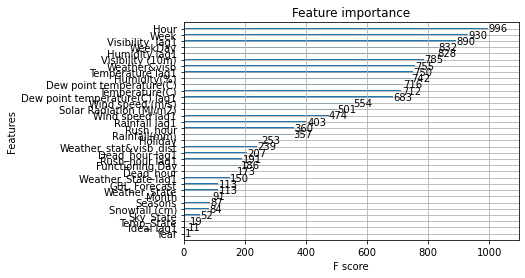

In [61]:
figure(figsize=(16, 10))
xgb.plot_importance(XGB)
plt.show()

In [110]:
selected_features = selected_features = ['Hour','Week', 'Month','Year', 'Solar Radiation (MJ/m2)','Rainfall(mm)',"Dew point temperature(C)",
                     'Snowfall (cm)','Wind speed (m/s)','Visibility (10m)','WeekDay',
                     'Seasons','Holiday' ,'Temperature(C)', 'Humidity(%)',
                     'Functioning Day','Rush_hour','Dead_hour','Weather_State',
                     'Weather&visb','Weather_stat&visb_dist','Sky_State','Temp_State','GBL_Forecast',
                     'Temperature lag1','Rainfall lag1', 'Visibility  lag1', 'Wind speed lag1',
                     'Weather_State lag1', 'Humidity lag1', 'Rush_hour lag1',
                     'Dead_hour lag1', 'Ideal lag1',"Dew point temperature(C) lag1"]


train = df_prep.copy()
train["y"] = np.log(df_prep["y"]+0.00001) ##--- someone explain why this works better than +1
#train["y"] = df_prep["y"]
X1 = train[selected_features]
y1 = train["y"]

# tss = TimeSeriesSplit(n_splits=2)
# train_ind,test_ind  = tss.split(X1,groups=[20,1])

X_train, X_test, y_train, y_test =\
train_test_split(X1, y1, test_size = 0.2, random_state=42,shuffle=True,)

XGB = xgb.XGBRegressor(colsample_bylevel=0.9,colsample_bytree=0.9,
             learning_rate=0.056, max_depth=3,
             min_child_weight=1, n_estimators=2100, n_jobs=-1, random_state=9110,
             subsample=0.887
                      )

XGB.fit(X_train, y_train)

prev_trainX , prev_testX = evaluationandSave(XGB,selected_features,prev_trainX , prev_testX )


(Train) RMSLE: 0.11304900834720479
(Test) RMSLE: 0.2453413136779098
---------------------------------
(Train) Prev RMSLE: 0.05292596084088082
(Test) Prev RMSLE: 0.23123412535219345
---------------------------------
Training Score: 99.90207308346078  %
Test Score: 99.60427855177234  %
---------------------------------
(Real) RMSLE: 0.3263680685092337
(Real) R2: 0.9295038739823196


### Auto Feature Selection RFECV Model

##### [Getting features in RFECV scikit-learn](https://stackoverflow.com/questions/50387089/getting-features-in-rfecv-scikit-learn)

### Grid search on them 

(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

### normal model with manual selection Wtih bagging 

In [ ]:
prev_train , prev_test = 0 , 0

In [ ]:
len(features)

(Train) RMSLE: 0.14553037854039572
(Test) RMSLE: 0.3588669286848413
---------------------------------
(Train) Prev RMSLE: 0
(Test) Prev RMSLE: 0
---------------------------------
Training Score: 99.66164569828081  %
Test Score: 98.14808428184578  %
---------------------------------
(Real) RMSLE: 0.4363028117834578
(Real) R2: 0.8216669474024867